In [44]:
import numpy as np
from random import uniform
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt

In [45]:
def generate_time_series_data(n):
    return np.sin(n + np.sin(n)**2)

input_samples = []
output_labels = []

input_range = 10 #pra cada ponto, olharemos 10 pontos antes
step_size = 0.3#amostras de valores entre n-8 até n e variando 0.3 entre cada valor
for n in range(0, 300):
    input_data = []
    output_data = []
    for x in np.arange(n - input_range, n, step_size):
        input_data.append(generate_time_series_data(x))
    input_samples.append(input_data)
    for y in np.arange(n, n + 3, step_size):
        output_data.append(generate_time_series_data(y))
    output_labels.append(output_data)


In [46]:
input_samples = np.array(input_samples)
output_labels = np.array(output_labels)

In [47]:
train_input, test_input, train_output, test_output = train_test_split(input_samples, output_labels, test_size=0.2, random_state=33)
print(train_input.shape)
print(train_output.shape)

(240, 34)
(240, 10)


In [48]:
neural_network_model = Sequential([
    Dense(units=5, input_shape=(34,), activation='relu'),   
    Dense(units=10, activation='linear'),
])

In [49]:
neural_network_model.compile(optimizer=Adam(learning_rate=0.1), loss='mean_squared_error', metrics=['mean_absolute_error'])

In [50]:
training_result = neural_network_model.fit(x=train_input, y=train_output, validation_split=0.2, batch_size=50, epochs=100, shuffle=True, verbose=2)

Epoch 1/100


4/4 - 1s - loss: 0.3568 - mean_absolute_error: 0.4764 - val_loss: 0.1871 - val_mean_absolute_error: 0.3545 - 680ms/epoch - 170ms/step
Epoch 2/100
4/4 - 0s - loss: 0.1522 - mean_absolute_error: 0.3168 - val_loss: 0.1180 - val_mean_absolute_error: 0.2801 - 34ms/epoch - 9ms/step
Epoch 3/100
4/4 - 0s - loss: 0.1141 - mean_absolute_error: 0.2772 - val_loss: 0.0953 - val_mean_absolute_error: 0.2478 - 42ms/epoch - 10ms/step
Epoch 4/100
4/4 - 0s - loss: 0.0936 - mean_absolute_error: 0.2460 - val_loss: 0.0847 - val_mean_absolute_error: 0.2348 - 35ms/epoch - 9ms/step
Epoch 5/100
4/4 - 0s - loss: 0.0726 - mean_absolute_error: 0.2185 - val_loss: 0.0612 - val_mean_absolute_error: 0.2054 - 38ms/epoch - 10ms/step
Epoch 6/100
4/4 - 0s - loss: 0.0576 - mean_absolute_error: 0.2000 - val_loss: 0.0500 - val_mean_absolute_error: 0.1850 - 39ms/epoch - 10ms/step
Epoch 7/100
4/4 - 0s - loss: 0.0499 - mean_absolute_error: 0.1843 - val_loss: 0.0510 - val_mean_absolute_error: 0.1889 - 39ms/epoch - 10ms/step
Epoc

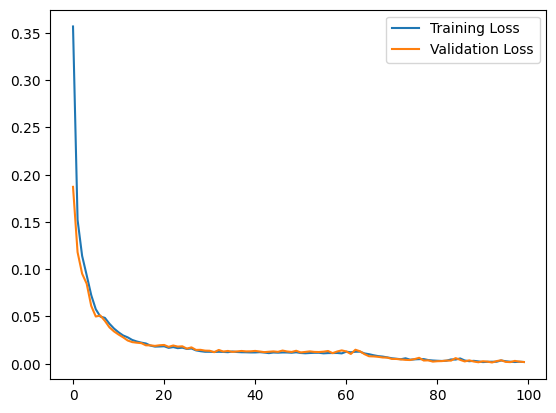

In [51]:
plt.plot(training_result.history['loss'], label='Training Loss')
plt.plot(training_result.history['val_loss'], label='Validation Loss')
plt.legend()

In [52]:
test_predictions = neural_network_model.predict(test_input)

2/2 [==============================] - 0s 2ms/step


In [53]:
mae = mean_absolute_error(test_output, test_predictions)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 0.032124741708000774
